In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
folder_path = "/content/drive/MyDrive/KULIAH/Semester 6/Praktisi/Pertemuan 1/Data"

# Mengecek ada file apa saja di `folder_path`
os.listdir(folder_path)

['2015.csv',
 '2016.csv',
 '2017.csv',
 '2018.csv',
 '2019.csv',
 '2020.csv',
 '2021.csv',
 '2022.csv']

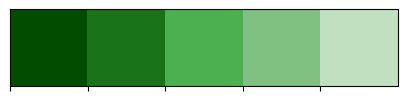

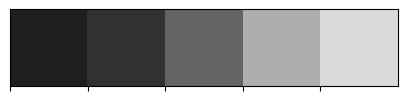

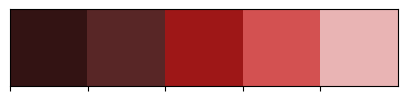

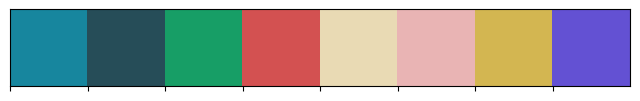

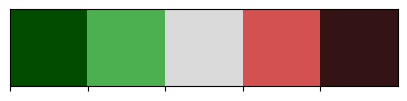

In [4]:
# Membuat Color pallete untuk mempercantik tampilan
colors_green = ["#004D00", "#197419", '#4CAF50', '#80C080', '#C0E0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#004D00", '#4CAF50', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_green)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [5]:
# Mendefinisikan path ke folder tempat file CSV disimpan
path_file_2022 = os.path.join(folder_path, '2022.csv')

# Membaca file CSV dan menyimpan isi ke dalam DataFrame sesuai dengan value `path_file_2022`
df_2022 = pd.read_csv(path_file_2022)

In [6]:
# drop Country tanpa Happiness Score
df_2022 = df_2022.dropna()

# mendapatkan kolom `object`
obj_col = df_2022.select_dtypes(include=['O']).columns

# Mendapatkan semua kolom kecuali 'RANK' dan 'Country'
columns = [col for col in obj_col if col not in ['RANK', 'Country']]

# Convert kolom numeric yang awalnya `object` menjadi `float`
for col in columns:
    df_2022.loc[:, col] = df_2022[col].str.replace(',', '.').astype(float)

In [7]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara AFC 2024
afc_countries = ["Qatar", "Indonesia", "Australia", "Jordan", "South Korea",
                 "Japan", "China", "United Arab Emirates", "Iraq", "Saudi Arabia",
                 "Tajikistan", "Thailand", "Uzbekistan", "Vietnam", "Kuwait*", "Malaysia"]

afc_df = df_2022.loc[df_2022['Country'].isin(afc_countries)]

In [8]:
afc_df.loc[afc_df['Country']=='United Arab Emirates', 'Country'] = 'UAE'

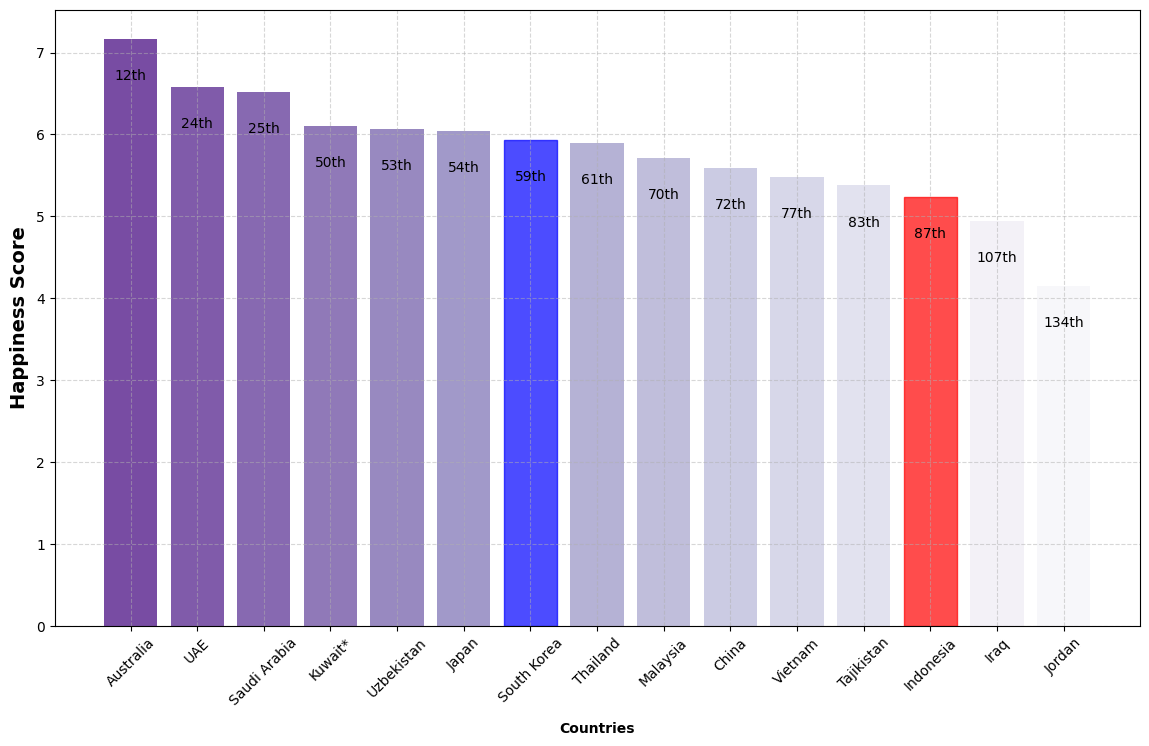

In [42]:
# Fungsi untuk membuat gradasi warna ungu
def generate_colors(n):
    cmap = plt.get_cmap('Purples')  # Gunakan skema warna ungu
    return [cmap(1 - i/n) for i in range(n)]

# Data
afc_countries = afc_df['Country']
happiness_scores = afc_df['Happiness score']
afc_idx = list(afc_df.index + 1)

# Mendapatkan jumlah negara ASEAN
n_countries = len(afc_countries)

# Membuat warna berbeda untuk setiap negara
colors = generate_colors(n_countries)

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara ASEAN
bars = ax.bar(afc_countries, happiness_scores, color=colors, alpha=0.7)

# Mengatur warna bar untuk Indonesia menjadi merah dan korea menjadi biru
for country, bar in zip(afc_countries, bars):
    if country == 'Indonesia':
        bar.set_color('red')
    elif country == 'South Korea':
        bar.set_color('blue')

# Customize ticks dan grid
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.grid(True, linestyle='--', alpha=0.5)

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=10, labelpad=10, fontweight='bold')

# Mengatur label sumbu y
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=5, fontweight='bold')

# Menambahkan anotasi pada setiap bar
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.5, f"{afc_idx[i]}th", ha='center', color='black', fontsize=10)

# Menampilkan plot
plt.show()


In [10]:
afc_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
11,12,Australia,7.162,7.244,7.081,2.011,1.9,1.203,0.772,0.676,0.258,0.341
23,24,UAE,6.576,6.66,6.492,1.809,1.998,0.98,0.633,0.702,0.204,0.25
24,25,Saudi Arabia,6.523,6.637,6.409,2.075,1.87,1.092,0.577,0.651,0.078,0.18
49,50,Kuwait*,6.106,6.235,5.977,1.621,1.904,0.983,0.747,0.617,0.087,0.147
52,53,Uzbekistan,6.063,6.178,5.948,1.913,1.219,1.092,0.6,0.716,0.283,0.24
53,54,Japan,6.039,6.119,5.959,1.487,1.835,1.089,0.866,0.537,0.007,0.218
58,59,South Korea,5.935,6.021,5.849,1.656,1.851,0.886,0.841,0.414,0.111,0.176
60,61,Thailand,5.891,5.994,5.788,1.6,1.535,1.096,0.697,0.617,0.321,0.026
69,70,Malaysia,5.711,5.845,5.578,1.471,1.689,0.938,0.62,0.654,0.213,0.126
71,72,China,5.585,5.65,5.52,1.516,1.508,0.958,0.705,0.656,0.099,0.142


In [11]:
afc_df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

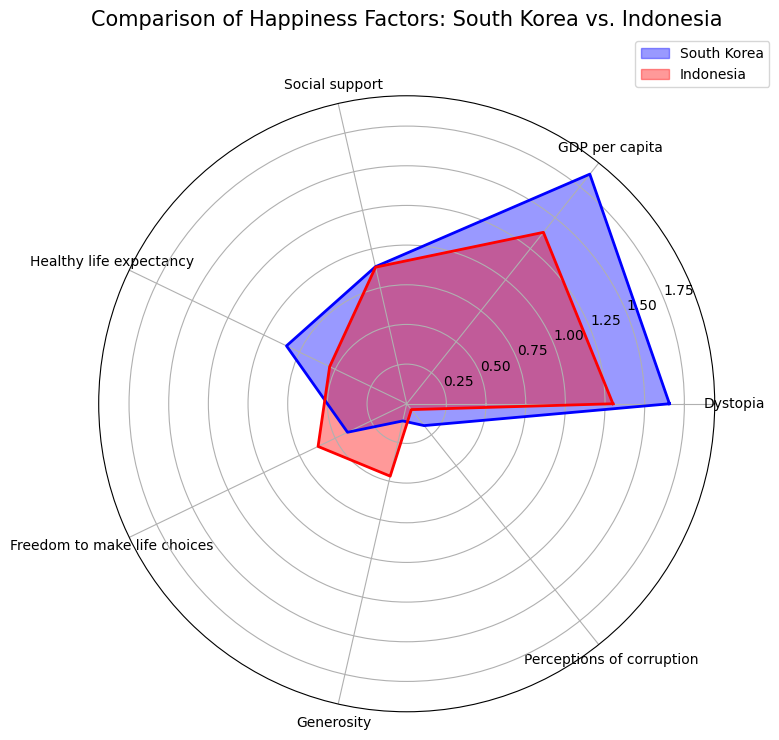

In [32]:
# Filter rows for South Korea and Indonesia
countries = ['South Korea', 'Indonesia']
df_plot = afc_df[afc_df['Country'].isin(countries)]

# Columns to include in the radar chart
columns = ['Dystopia (1.83) + residual', 'Explained by: GDP per capita',
           'Explained by: Social support', 'Explained by: Healthy life expectancy',
           'Explained by: Freedom to make life choices',
           'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Number of variables we're plotting.
num_vars = len(columns)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop by appending the first angle at the end.

# Draw the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['blue', 'red']  # Warna untuk setiap negara

for k, (idx, row) in enumerate(df_plot.iterrows()):
    data = row[columns].tolist() + row[columns].tolist()[:1]  # Complete the loop
    ax.fill(angles, data, alpha=0.4, label=row['Country'], color=colors[k])
    ax.plot(angles, data, color=colors[k], linewidth=2)  # Garis radar chart

# Labels for each point
ax.set_xticks(angles[:-1])
col_name = ['Dystopia', 'GDP per capita',
           'Social support', 'Healthy life expectancy',
           'Freedom to make life choices',
           'Generosity', 'Perceptions of corruption']
ax.set_xticklabels(col_name)

# Title and legend
plt.title('Comparison of Happiness Factors: South Korea vs. Indonesia', size=15, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


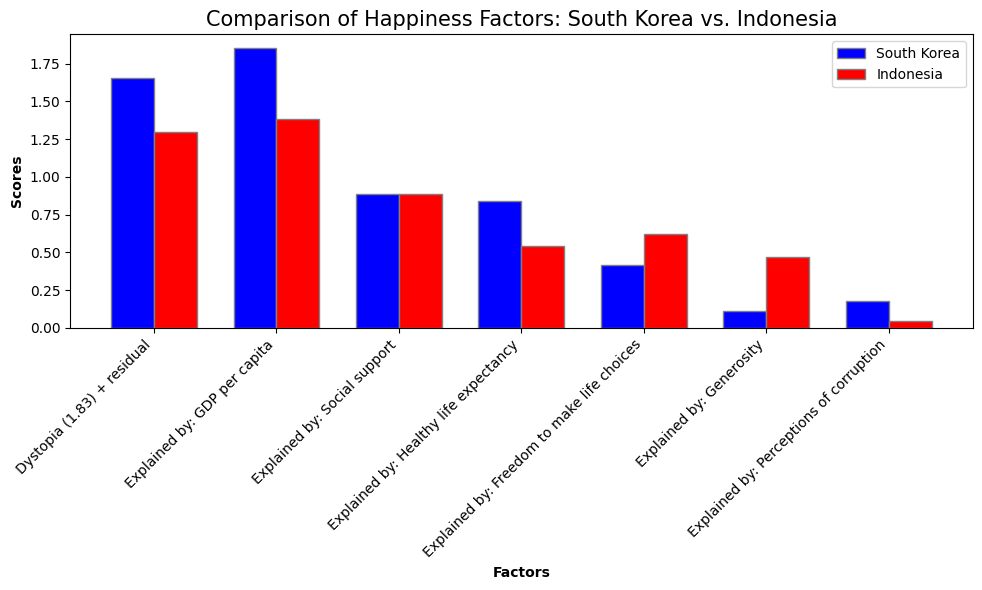

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Filter rows for South Korea and Indonesia
countries = ['South Korea', 'Indonesia']
df_plot = afc_df[afc_df['Country'].isin(countries)]

# Columns to include in the grouped bar chart
columns = ['Dystopia (1.83) + residual', 'Explained by: GDP per capita',
           'Explained by: Social support', 'Explained by: Healthy life expectancy',
           'Explained by: Freedom to make life choices',
           'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Number of variables we're plotting
num_vars = len(columns)

# Data for South Korea and Indonesia
sk_data = df_plot[df_plot['Country'] == 'South Korea'][columns].values[0]
id_data = df_plot[df_plot['Country'] == 'Indonesia'][columns].values[0]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(num_vars)
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, sk_data, color='blue', width=bar_width, edgecolor='grey', label='South Korea')
plt.bar(r2, id_data, color='red', width=bar_width, edgecolor='grey', label='Indonesia')

# Add xticks on the middle of the group bars
plt.xlabel('Factors', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(num_vars)], columns, rotation=45, ha='right')

# Add ylabel
plt.ylabel('Scores', fontweight='bold')

# Add title
plt.title('Comparison of Happiness Factors: South Korea vs. Indonesia', size=15)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [14]:
row

RANK                                                 87
Country                                       Indonesia
Happiness score                                    5.24
Whisker-high                                      5.341
Whisker-low                                       5.139
Dystopia (1.83) + residual                          1.3
Explained by: GDP per capita                      1.382
Explained by: Social support                      0.883
Explained by: Healthy life expectancy             0.539
Explained by: Freedom to make life choices         0.62
Explained by: Generosity                          0.468
Explained by: Perceptions of corruption           0.047
Name: 86, dtype: object